# Data aliasing

One of the trickiest things about programming is figuring out exactly what data a variable refers to. Remember that we use names like `data` and `salary` to represent memory cells holding data values. The names are easier to remember than the physical memory addresses, but we can get fooled. For example, it's obvious that two variables `x` and `y` can both have the same integer value 7:

In [49]:
x = y = 7
print(x,y)

7 7


But, did you know that they are both referring to the same 7 object? In other words, variables in Python are always references or pointers to data so the variables are not technically holding the value.  Pointers are like phone numbers that "point at" phones but pointers themselves are not the phone itself.

We can uncover this secret level of indirection using the built-in `id(x)` function that returns the physical memory address pointed out by `x`. To demonstrate that, let's ask what `x` and `y` point at:

In [50]:
x = y = 7
print(id(x))
print(id(y))

4332443168
4332443168


Wow! They are the same.  That number represents the memory location where Python has stored the shared 7 object.

Of course, as programmers we don't think of these atomic elements as referring to the same object; just keep in mind that they do. We are more likely to view them as copies of the same number, as lolviz shows visually:

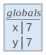

In [51]:
from lolviz import *
callviz(varnames=['x','y'])

Let's verify that the same thing happens for strings:

In [52]:
name = 'parrt'
userid = name # userid now points at the same memory as name
print(id(name))
print(id(userid))

4366039392
4366039392


Ok, great, so we are in fact sharing the same memory address to hold the string `'parrt'` and both of the variable names point at that same shared space. We call this *aliasing*, in the language implementation business.

Things only get freaky when we start changing shared data. This can't happen with integers and strings because they are *immutable* (can't be changed). Let's look at two identical copies of a single list:

4550240328
4550241224


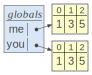

In [53]:
you = [1,3,5]
me  = [1,3,5]
print(id(you))
print(id(me))
callviz(varnames=['you','me'])

Those lists have the same value but live a different memory addresses. They are not aliased; they are not shared. Consequently, changing one does not change the other:

In [54]:
you = [1,3,5]
me  = [1,3,5]
print(you, me)
you[0] = 99
print(you, me)

[1, 3, 5] [1, 3, 5]
[99, 3, 5] [1, 3, 5]


On the other hand, let's see what happens if we make `you` and `me` share the same copy of the list (point at the same memory location):

[1, 3, 5] [1, 3, 5]


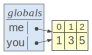

In [55]:
you = [1,3,5]
me  = you
print(you, me)
callviz(varnames=['you','me'])

Now, changing one appears to change the other, but in fact both simply refer to the same location in memory:

[99, 3, 5] [99, 3, 5]


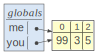

In [56]:
you[0] = 99
print(you, me)
callviz(varnames=['you','me'])

Don't confuse changing the pointer to the list with changing the list elements:

In [57]:
you = [1,3,5]
me  = you
me = [9,7,5] # doesn't affect `you` at all
print(you)
print(me)

[1, 3, 5]
[9, 7, 5]


This aliasing of data happens a great deal when we pass lists or other data structures to functions. Passing list `Quantity` to a function whose argument is called `data` means that the two are aliased. We'll look at this in more detail in the "Visibility of symbols" section of [Organizing your code with functions](functions.ipynb).